In [1]:


import matplotlib.pyplot as plt
import numpy as np

from sandpile import *
from utils import *
from multiprocessing import Pool, Process, set_start_method
import multiprocessing as mp



In [ ]:
from pathlib import Path
import sys

def run_system(task):
    dim, grid, boundary, perturbation, crit, time_steps = task
    path_name = Path(f"data_{dim}_{grid}_{boundary[0]}_{perturbation[0]}_{crit}")
    if path_name.exists():
        with mp.Lock() as lock:
            print(f"file {path_name.name} already exists\n", end=" ", file=sys.stderr)
            return
    
    system = SandpileND(dim, grid, crit, boundary, perturbation)
    system(time_steps)
    
    system.save_data()
    del system


N = 1_000_000
tasks = [
    (1, 40, "open", "conservative", 7, N),
    (1, 40, "closed", "non conservative", 7, N),
    (2, 20, "open", "non conservative", 7, N),
    (2, 20, "closed", "conservative", 7, N),
    (2, 5, "closed", "non conservative", 7, N),
    (2, 10, "closed", "non conservative", 7, N),
    (2, 20, "closed", "non conservative", 7, N),
    (2, 40, "closed", "non conservative", 7, N),
    (2, 5, "open", "conservative", 7, N),
    (2, 10, "open", "conservative", 7, N),
    (2, 20, "open", "conservative", 7, N),
    (2, 40, "open", "conservative", 7, N),
    (3, 20, "closed", "non conservative", 7, N),
    (3, 40, "closed", "non conservative", 7, N),
    (4, 15, "closed", "non conservative", 7, N),
    (4, 20, "closed", "non conservative", 7, N), # lol no fuck
    (5, 15, "closed", "non conservative", 7, N),
]

ctx = mp.get_context('fork')

with ctx.Pool(mp.cpu_count() - 2) as pool:
    pool.map(run_system, tasks)


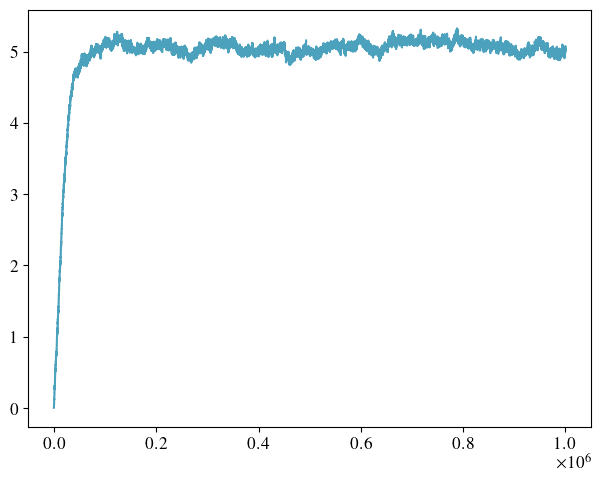

In [8]:
from sandpile import *
import matplotlib.pyplot as plt


plt.figure(1, figsize=(12, 5))

dim = 2
bound = "o"
cons = "c"
grid = 20
crit = 7
plt.subplot(121)
system = SandpileND.load_from_file(f"data_{dim}_{20}_{bound}_{cons}_{crit}")

plt.plot(range(system.average_slopes.__len__()), system.average_slopes)





In [9]:
data = system.get_avalanche_data()


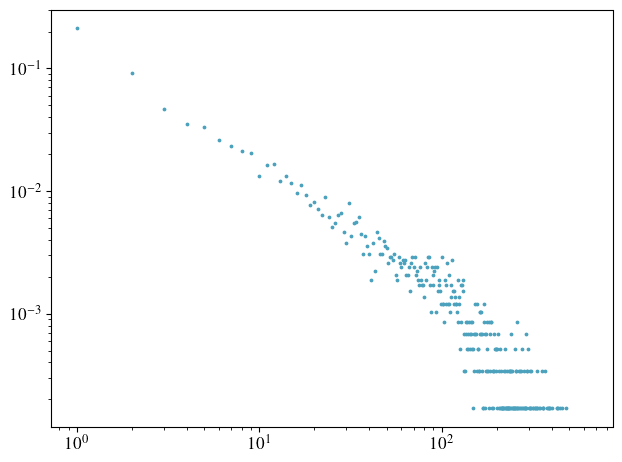

In [10]:
size, time_steps = get_hist(data["size"])

plt.yscale("log")
plt.xscale("log")
plt.scatter(time_steps, size, s=3)